In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [15]:
X = pd.read_csv("cleaned_students_score2.csv")
X.columns

Index(['index', 'Unnamed: 0', 'StudentId', 'Gender', 'EthnicGroup',
       'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus',
       'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans',
       'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore',
       'Gender_female', 'Gender_male', 'LunchType_free/reduced',
       'LunchType_standard', 'EthnicGroup_Label', 'ParentEduc_Label',
       'TestPrep_Label', 'ParentMaritalStatus_Label', 'PracticeSport_Label',
       'IsFirstChild_Label', 'TransportMeans_Label', 'WklyStudyHours_Label'],
      dtype='object')

2. a) Find the mean, median and average scores in mathematics, reading and writing.
b) Find the mean, median and average scores for males and females.
c) What is the coefficient of variation of the scores?

sto su average scores?

In [12]:
X[["MathScore", "ReadingScore", "WritingScore"]].mean()

MathScore       66.559948
ReadingScore    69.390081
WritingScore    68.429337
dtype: float64

In [36]:
X[["MathScore", "ReadingScore", "WritingScore"]].median()

MathScore       67.0
ReadingScore    70.0
WritingScore    69.0
dtype: float64

In [80]:
X.groupby('Gender')['MathScore'].mean()

Gender
female    64.119419
male      69.038488
Name: MathScore, dtype: float64

In [81]:
X.groupby('Gender')['ReadingScore'].mean()

Gender
female    72.900825
male      65.824657
Name: ReadingScore, dtype: float64

In [13]:
X.groupby('Gender')['WritingScore'].mean()

Gender
female    72.899189
male      63.889866
Name: WritingScore, dtype: float64

In [48]:
X["MathScore"].std() / X.MathScore.mean() * 100

23.053282736702542

In [51]:
X["ReadingScore"].std() / X.ReadingScore.mean() * 100

21.271325834740303

In [52]:
X["WritingScore"].std() / X.WritingScore.mean() * 100

22.574844991058495

In [53]:
X["Gender_female"].std() / X.Gender_female.mean() * 100

99.23192232116615

In [17]:
X["Gender_male"].std() / X.Gender_male.mean() * 100

100.7774838968454

3. a) Use a statistical test to test the hypothesis: H0: the mean mathematical scores of females and males are equal.

In [18]:
from scipy.stats import f_oneway
female_scores = X[X['Gender'] == 'female']['MathScore']
male_scores = X[X['Gender'] == 'male']['MathScore']
stat, p = f_oneway(female_scores, male_scores)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('the mean mathematical scores of females and males are equal')
else:
	print('the mean mathematical scores of females and males are not equal')

stat=767.757, p=0.000
the mean mathematical scores of females and males are not equal


4. a) Use a statistical test to test the hypothesis:
H0 Gender did not affect the writing scores.
H1 Gender affected the writing score.



In [19]:
from scipy import stats

In [20]:
female_scores = X[X['Gender'] == 'female']['WritingScore']
male_scores = X[X['Gender'] == 'male']['WritingScore']
t_statistic, p_value = stats.ttest_ind(female_scores, male_scores)
alpha = 0.05
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: Gender affects the writing score.")
else:
    print("Fail to reject the null hypothesis: Gender did not affect the writing score.")

T-statistic: 52.01694529394566
P-value: 0.0
Reject the null hypothesis: Gender affects the writing score.


In [21]:
female_scores = X[X['Gender'] == 'female']['WritingScore']
male_scores = X[X['Gender'] == 'male']['WritingScore']
stats.levene(female_scores, male_scores)

LeveneResult(statistic=1.6658087333389284, pvalue=0.19683111067146783)

5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

In [22]:
from scipy.stats import kruskal
female_scores = X[X['Gender'] == 'female']['WritingScore']
male_scores = X[X['Gender'] == 'male']['WritingScore']
stat, p = kruskal(female_scores, male_scores)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2412.856, p=0.000
Probably different distributions


In [23]:
female_scores = X[X['Gender'] == 'female']['MathScore']
male_scores = X[X['Gender'] == 'male']['MathScore']
stat, p = kruskal(female_scores, male_scores)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=698.353, p=0.000
Probably different distributions


In [124]:
female_scores = X[X['Gender'] == 'female']['ReadingScore']
male_scores = X[X['Gender'] == 'male']['ReadingScore']
stat, p = kruskal(female_scores, male_scores)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=1616.634, p=0.000
Probably different distributions


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

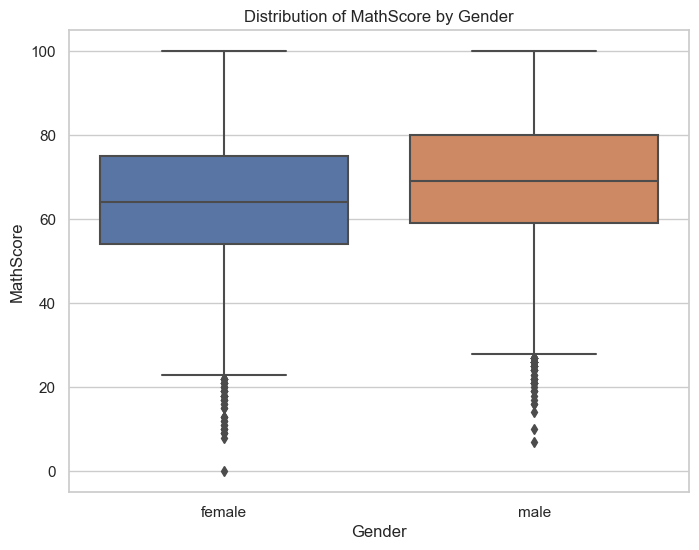

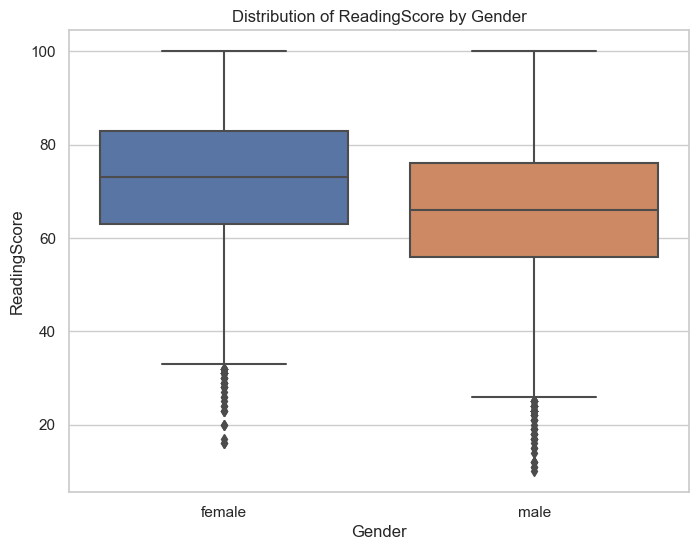

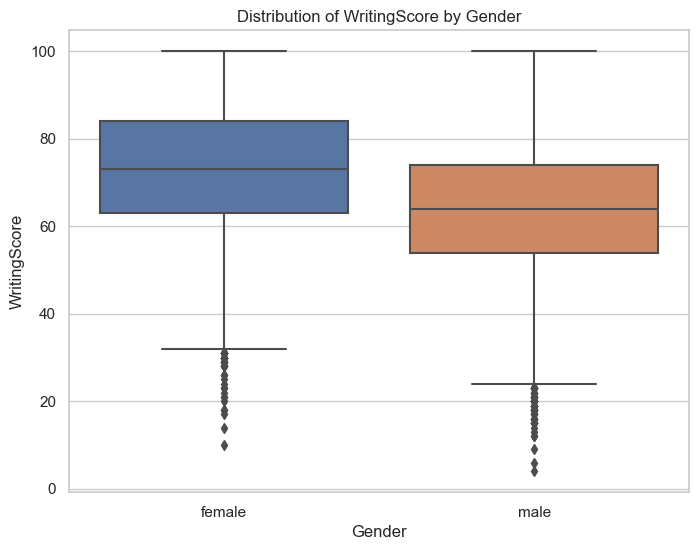

In [24]:
sns.set(style="whitegrid")

for score_column in ['MathScore', 'ReadingScore', 'WritingScore']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Gender', y=score_column, data=X)
    plt.title(f'Distribution of {score_column} by Gender')
    plt.xlabel('Gender')
    plt.ylabel(score_column)
    plt.show()